Dane o ofertach pobrane ze strony: https://www.otomoto.pl/?category=motocykle-i-quady
Komenda do pobrania danych - poniżej w komentarzu (aby nie uruchamiać jej).
Dane z dnia 2019-04-19 już są pobrane do pliku ./scrapy_motory/motory.json

In [328]:
%matplotlib inline

In [329]:
#%%cmd
#cd scrapy_motory
#scrapy crawl motory -o motory.json

In [330]:
# data pobrania danych - posłuży nam potem do przeliczalnia na PLN po kursie średnim sz tego dnia
data_pobrania_danych='2019-02-01'
rok_pobrania_danych=int(data_pobrania_danych[:4])
PLIK_DANYCH_JSON = './scrapy_motory/motory.json'

Wczytujemy dane z pliku JSON

In [331]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 60)
import json
import seaborn as sns
import numpy as np

def wczytaj_plik_danych(nazwa_pliku):
    with open(nazwa_pliku) as plik_json:
        data = json.load(plik_json)
        df = pd.DataFrame.from_dict(data)
        return df

In [332]:
dane = wczytaj_plik_danych(PLIK_DANYCH_JSON)

#### Wyświetlmy sobie nazwy kolumn i statystyki o danych

In [333]:
dane.columns

Index(['Bezwypadkowy', 'Cena', 'Faktura VAT', 'Kategoria', 'Kolor',
       'Kraj pochodzenia', 'Leasing', 'Liczba pozostałych rat', 'Link',
       'Lokalizacja', 'Marka pojazdu', 'Matowy', 'Metalik', 'Miesięczna rata',
       'Moc', 'Model pojazdu', 'Możliwość finansowania',
       'Numer rejestracyjny pojazdu', 'Oferta od', 'Opłata początkowa',
       'Perłowy', 'Pierwsza rejestracja', 'Pierwszy właściciel',
       'Pojemność skokowa', 'Przebieg', 'Rodzaj napędu', 'Rodzaj paliwa',
       'Rok produkcji', 'Serwisowany w ASO', 'Skrzynia biegów', 'Stan',
       'Tuning', 'Typ', 'Typ Silnika', 'Uszkodzony', 'VAT marża', 'VIN',
       'Waluta', 'Wartość wykupu', 'Zarejestrowany jako zabytek',
       'Zarejestrowany w Polsce'],
      dtype='object')

In [334]:
dane.dtypes

Bezwypadkowy                   object
Cena                           object
Faktura VAT                    object
Kategoria                      object
Kolor                          object
Kraj pochodzenia               object
Leasing                        object
Liczba pozostałych rat         object
Link                           object
Lokalizacja                    object
Marka pojazdu                  object
Matowy                         object
Metalik                        object
Miesięczna rata                object
Moc                            object
Model pojazdu                  object
Możliwość finansowania         object
Numer rejestracyjny pojazdu    object
Oferta od                      object
Opłata początkowa              object
Perłowy                        object
Pierwsza rejestracja           object
Pierwszy właściciel            object
Pojemność skokowa              object
Przebieg                       object
Rodzaj napędu                  object
Rodzaj paliw

In [335]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 41 columns):
Bezwypadkowy                   11086 non-null object
Cena                           17574 non-null object
Faktura VAT                    5947 non-null object
Kategoria                      17574 non-null object
Kolor                          17573 non-null object
Kraj pochodzenia               8781 non-null object
Leasing                        1775 non-null object
Liczba pozostałych rat         95 non-null object
Link                           17574 non-null object
Lokalizacja                    17574 non-null object
Marka pojazdu                  17574 non-null object
Matowy                         1450 non-null object
Metalik                        5977 non-null object
Miesięczna rata                95 non-null object
Moc                            11788 non-null object
Model pojazdu                  17485 non-null object
Możliwość finansowania         5389 non-null object
Nu

In [336]:
dane.describe()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
count,11086,17574,5947,17574,17573,8781,1775,95,17574,17574,17574,1450,5977,95,11788,17485,5389,658,17574,93,1804,2859,3445,15852,17573,13851,17574,17574,2811,12950,17574,665,17574,13339,390,3798,1926,17574,94,18,5308
unique,1,2072,1,1,14,25,1,14,17574,2648,124,1,1,88,246,696,1,652,2,86,1,2061,1,539,4640,3,3,79,1,4,2,1,10,3,1,1,1918,2,84,1,1
top,Tak,19900,Tak,Motocykle,Czarny,Polska,Tak,36,https://www.otomoto.pl/oferta/barton-quad-atv-...,"ul. Wyzwolenia 408 B - 43-265 Mizerów, pszczyń...",Honda,Tak,Tak,823 PLN,15 KM,Inny,Tak,GWE 5JF7,Firmy,1 PLN,Tak,1 styczeń 2007,Tak,125 cm3,1 km,Łańcuch,Benzyna,2018,Tak,Manualna,Używane,Tak,Turystyczny,Czterosuwowy,Tak,Tak,5J11YBJD47W000374,PLN,1 PLN,Tak,Tak
freq,11086,177,5947,17574,5044,3061,1775,41,1,333,2935,1450,5977,2,765,2096,5389,2,10649,3,1804,15,3445,2367,4794,7773,17407,2672,2811,9535,13465,665,3679,12528,390,3798,2,17459,3,18,5308


# Kolumny do usunięcia po wstępnej analizie :
|pole|dlaczego do skasowania|
------------ | -------------|
|**Kategoria**| wszystkie mają tę samą wartość: Motocykle|
| **Link**|link do oferty (pomocniczy), każda oferta ma unikalny link|
| **Numer rejestracyjny pojazdu**|każdy motor ma unikalny numer|
|**VIN**| każdy motor ma unikalny numer|
|**Bezwypadkowy**|60% ma wartość TAK, pozostale=brak danych (nie ma wartości NIE)- czyli w praktyce nie wiadomo czy zataił czy miał wypadek|
|**Pierwsza rejestracja**|W większości brak danych, jeśli jest, to zazwyczaj jest najdalej rok produkcji + 1| 


### Pozostałe kolumny związane z finansowaniem - nie mają znaczenia w naszej analizie:
Faktura VAT,Leasing,Liczba pozostałych rat,Miesięczna rata,Możliwość finansowania,Opłata początkowa,VAT marża,'Wartość wykupu<br>
**Kasujemy te kolumny**

In [337]:
# nazwy kolumn które docelowo zostaną skasowane z danych wejściowych
kolumny_do_skasowania=[
    'Lokalizacja','Kategoria','Link','Numer rejestracyjny pojazdu','VIN','Bezwypadkowy','Pierwsza rejestracja',
    'Faktura VAT','Leasing','Liczba pozostałych rat','Miesięczna rata','Możliwość finansowania',
    'Opłata początkowa','VAT marża','Wartość wykupu'
]

# funkcje konwersji danych do wykonania na zbiorze
funkcje_konwersji_danych = []

## Pole 'Kraj pochodzenia' - kasujemy, bo jest 8633 wartosci NaN'

In [338]:
dane['Kraj pochodzenia'].value_counts(dropna=False)
kolumny_do_skasowania.append('Kraj pochodzenia')

## Pole ''Skrzynia biegów' - kasujemy, bo jest 4511 wartosci NaN'

In [339]:
dane['Skrzynia biegów'].value_counts(dropna=False)

Manualna           9535
NaN                4624
Automatyczna       2402
Bezstopniowa        777
Półautomatyczna     236
Name: Skrzynia biegów, dtype: int64

In [340]:
kolumny_do_skasowania.append('Skrzynia biegów')

## Pole 'Zarejestrowany w Polsce' - kasujemy, bo 75% wartosci NaN'

In [341]:
dane['Zarejestrowany w Polsce'].value_counts(dropna=False)

NaN    12266
Tak     5308
Name: Zarejestrowany w Polsce, dtype: int64

In [342]:
kolumny_do_skasowania.append('Zarejestrowany w Polsce')

## Pole 'Rodzaj paliwa' - kasujemy, bo praktycznie 99% to "Benzyna"

In [343]:
dane['Rodzaj paliwa'].value_counts(dropna=False)

Benzyna        17407
Elektryczny      146
Diesel            21
Name: Rodzaj paliwa, dtype: int64

In [344]:
kolumny_do_skasowania.append('Rodzaj paliwa')

# Pojazdy uszkodzone i zabytkowe - kasujemy wiersze oraz kolumny
#### Kasujemy pojazdy uszkodzone (390 pozycji), a potem kolumnę "Uszkodzony"
ceny pojazdów uszkodzonych mogą się znacznie różnić zależnie od rodzaju uszkodzenia (np. ten sam model z lekkim otarciem lakieru vs. rozwalonym silnikiem - ceny będą diametralnie różnie), więc są niereprezentatywne i będą źle wpływać na model
#### Kasujemy pojazdy zabytkowe (18 pozycji) oraz kolumnę"Zarejestrowany jako zabytek"
wycena pojazdów zabytkowych może być przez rzeczoznawcę wykonana, nie przez komputer <br>
jest ich bardzo mało w zbiorze danych, zależnie od stanu zabytku jego cena może być bardzo różna

In [345]:
fun_skasuj_pojazdy_uszkodzone = lambda df: df.drop(df[df['Uszkodzony'] =="Tak"].index, axis=0, inplace=True)
fun_skasuj_pojazdy_zabytkowe = lambda df: df.drop(df[df['Zarejestrowany jako zabytek'] =="Tak"].index, axis=0, inplace=True)

funkcje_konwersji_danych.extend([fun_skasuj_pojazdy_uszkodzone,fun_skasuj_pojazdy_zabytkowe])
kolumny_do_skasowania.extend(['Uszkodzony','Zarejestrowany jako zabytek'])

fun_skasuj_pojazdy_uszkodzone(dane)
fun_skasuj_pojazdy_zabytkowe(dane)

In [346]:
print('Ile pozostało uszkodzonych:', dane.loc[dane['Uszkodzony'] == 'Tak','Uszkodzony'].count())
print('Ile pozostało zabytkowych:', dane.loc[dane['Zarejestrowany jako zabytek'] == 'Tak','Zarejestrowany jako zabytek'].count())

Ile pozostało uszkodzonych: 0
Ile pozostało zabytkowych: 0


### Pole 'Cena' - sprawdzenie czy są NaN (nie ma) oraz konwersja na liczbę

In [347]:
# Sprawdzamy pole Cena - czy są jakieś braki
print(dane.Cena.isnull().sum())
print(dane.Cena.dtype)

0
object


In [348]:
# Separatorem dziesiętnym w polu Cena jest przecinek - ustawimy locale aby odpowiednio to obsłużył
import locale

def zamiana_ceny_na_liczbe(df):
    print('Zamieniamy pole Cena na liczby')
    locale.setlocale(locale.LC_ALL,'pl_PL')
    df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
    # Kasujemy wiersze które nie mają ceny
    df.drop(df[df['Cena'].isnull()].index,axis=0, inplace=True)
    return df

funkcje_konwersji_danych.append(zamiana_ceny_na_liczbe)

#test
zamiana_ceny_na_liczbe(dane)
dane.head(3)

Zamieniamy pole Cena na liczby


,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce
0,NaN,6800.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-xf-suzuki...,"CISOWA 17 - 83-250 Skarszewy, starogardzki, Po...",Suzuki,NaN,Tak,NaN,37 KM,XF,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,680 cm3,60 000 km,Łańcuch,Benzyna,2000,NaN,Manualna,Używane,NaN,Enduro,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN
1,Tak,19500.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-gsx-1250-...,"Podańsko, goleniowski, Zachodniopomorskie",Suzuki,NaN,Tak,NaN,98 KM,GSX,NaN,NaN,Osoby prywatnej,NaN,NaN,4 sierpień 2010,NaN,1 255 cm3,30 900 km,Łańcuch,Benzyna,2010,Tak,Manualna,Używane,NaN,Turystyczny,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN
2,Tak,11500.0,NaN,Motocykle,Szary,Francja,NaN,NaN,https://www.otomoto.pl/oferta/kymco-kymco-125-...,"Rąbień, gm. Aleksandrów Łódzki, zgierski, Łódzkie",Kymco,NaN,Tak,NaN,15 KM,Inny,NaN,NaN,Osoby prywatnej,NaN,NaN,NaN,Tak,125 cm3,5 400 km,Pas napędowy,Benzyna,2017,NaN,Automatyczna,Używane,NaN,Skuter,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN


### Pole 'Rok produkcji' zamienimy na 'Wiek pojazdu' (w latach). Pojazdy starsze od 30 lat traktujemy jako zabytek i kasujemy ze zbioru (ponad 400 pozycji) - ponieważ po 30 roku cena rośnie zamiast spadać (patrz wykres)

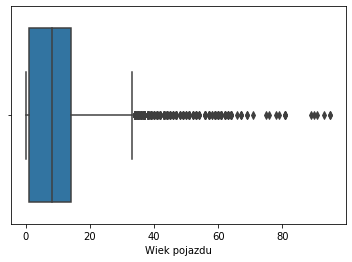

In [349]:
wiek_pojazdu = (rok_pobrania_danych - dane['Rok produkcji'].astype(int)).rename('Wiek pojazdu')

# zamien_rok_produkcji_na_wiek(dane)
# funkcje.append(zamien_rok_produkcji_na_wiek)
sns.boxplot(x=wiek_pojazdu)

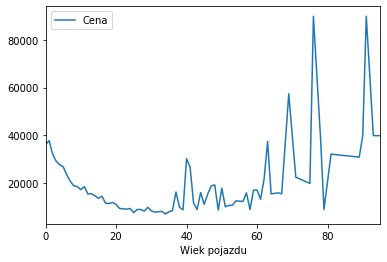

In [350]:
pd.concat([wiek_pojazdu,dane['Cena']], axis=1).groupby('Wiek pojazdu').mean().plot()

In [351]:
print(len(wiek_pojazdu[wiek_pojazdu > 30]))

425


In [352]:
def przelicz_rok_produkcji_na_wiek(df):
    df['Wiek pojazdu'] = (rok_pobrania_danych - df['Rok produkcji'].astype(int))
    df.drop(df[df['Wiek pojazdu'] > 30].index, axis=0, inplace=True)

kolumny_do_skasowania.append('Rok produkcji')

funkcje_konwersji_danych.append(przelicz_rok_produkcji_na_wiek)

przelicz_rok_produkcji_na_wiek(dane)
dane.head()

,Bezwypadkowy,Cena,Faktura VAT,Kategoria,Kolor,Kraj pochodzenia,Leasing,Liczba pozostałych rat,Link,Lokalizacja,Marka pojazdu,Matowy,Metalik,Miesięczna rata,Moc,Model pojazdu,Możliwość finansowania,Numer rejestracyjny pojazdu,Oferta od,Opłata początkowa,Perłowy,Pierwsza rejestracja,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Rodzaj paliwa,Rok produkcji,Serwisowany w ASO,Skrzynia biegów,Stan,Tuning,Typ,Typ Silnika,Uszkodzony,VAT marża,VIN,Waluta,Wartość wykupu,Zarejestrowany jako zabytek,Zarejestrowany w Polsce,Wiek pojazdu
0,NaN,6800.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-xf-suzuki...,"CISOWA 17 - 83-250 Skarszewy, starogardzki, Po...",Suzuki,NaN,Tak,NaN,37 KM,XF,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,680 cm3,60 000 km,Łańcuch,Benzyna,2000,NaN,Manualna,Używane,NaN,Enduro,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN,19
1,Tak,19500.0,NaN,Motocykle,Niebieski,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/suzuki-gsx-1250-...,"Podańsko, goleniowski, Zachodniopomorskie",Suzuki,NaN,Tak,NaN,98 KM,GSX,NaN,NaN,Osoby prywatnej,NaN,NaN,4 sierpień 2010,NaN,1 255 cm3,30 900 km,Łańcuch,Benzyna,2010,Tak,Manualna,Używane,NaN,Turystyczny,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN,9
2,Tak,11500.0,NaN,Motocykle,Szary,Francja,NaN,NaN,https://www.otomoto.pl/oferta/kymco-kymco-125-...,"Rąbień, gm. Aleksandrów Łódzki, zgierski, Łódzkie",Kymco,NaN,Tak,NaN,15 KM,Inny,NaN,NaN,Osoby prywatnej,NaN,NaN,NaN,Tak,125 cm3,5 400 km,Pas napędowy,Benzyna,2017,NaN,Automatyczna,Używane,NaN,Skuter,Czterosuwowy,NaN,Tak,NaN,PLN,NaN,NaN,NaN,2
3,Tak,49000.0,NaN,Motocykle,Inny kolor,NaN,NaN,NaN,https://www.otomoto.pl/oferta/harley-davidson-...,"Górczewska 30 - 01-147 Warszawa, Mazowieckie (...",Harley-Davidson,NaN,Tak,NaN,NaN,Sportster,Tak,NaN,Firmy,NaN,NaN,NaN,NaN,1 202 cm3,1 km,Pas napędowy,Benzyna,2019,NaN,NaN,Nowe,NaN,Cruiser,Czterosuwowy,NaN,NaN,NaN,PLN,NaN,NaN,NaN,0
4,Tak,6900.0,NaN,Motocykle,Czarny,Niemcy,NaN,NaN,https://www.otomoto.pl/oferta/honda-cbr-honda-...,"Szamotuły,Gaj Mały 114B - 64-520 Szamotuły, sz...",Honda,NaN,NaN,NaN,14 KM,CBR,NaN,NaN,Firmy,NaN,NaN,NaN,NaN,125 cm3,26 000 km,Łańcuch,Benzyna,2007,NaN,Manualna,Używane,NaN,Sportowy,NaN,NaN,NaN,NaN,PLN,NaN,NaN,Tak,12


##### Pole wiek pojazdu po konwersji i skasowaniu "zabytków" wygląda OK

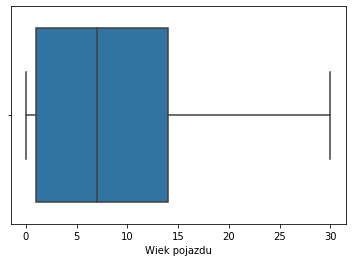

In [353]:
sns.boxplot(x=dane['Wiek pojazdu'])

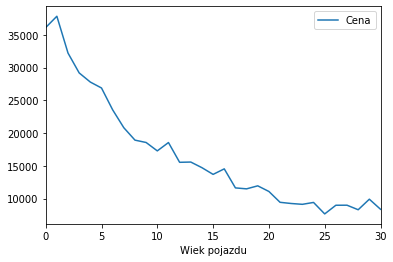

In [354]:
dane[['Wiek pojazdu','Cena']].groupby('Wiek pojazdu').mean().plot()

# Analizujemy pole Waluta - są w zbiorze pojazdy w innych walutach, więc przeliczamy je na PLN po kursie średnim NBP z daty ściągnięcia danych ze strony 
Uwaga - jeśli będzie błąd pobrania danych z NB to proszę zmienić parametr `data_pobrania_danych` <br>
na +/1-2 dni bo być może w tej dacie nie ma tabeli kursów NBP

In [355]:
dane.groupby('Waluta').size()

Waluta
EUR      114
PLN    16615
dtype: int64

In [356]:
import requests
import json

def pobierz_kurs_sredni_nbp(data,waluta):
    """Pobiera kurs średni NBP dla podanej daty (format daty: yyyy-mm-dd) oraz kodu waluty (np. EUR)"""
    NBP_URL = f'http://api.nbp.pl/api/exchangerates/rates/A/{waluta}/{data}/'
    response = requests.get(NBP_URL)
    if(response.ok):
        api_data = json.loads(response.content)
        return api_data['rates'][0]['mid']
    else:
        response.raise_for_status()

# test pobrania kursu
pobierz_kurs_sredni_nbp(data_pobrania_danych,'EUR')

4.2706

#### Sprawdzamy jakie mamy waluty w zbiorze danych

In [357]:
dane['Waluta'].value_counts(dropna=False)

PLN    16615
EUR      114
Name: Waluta, dtype: int64

In [358]:
# dla każdej waluty innej niż PLN przeliczamy na PLN
def przelicz_ceny_po_kursie_srednim_nbp(df):
    print('Przeliczamy ceny inne niż PLN po kursie średnim NBP')
    for waluta in df['Waluta'].unique():
        if waluta=='PLN':
            continue
        kurs = pobierz_kurs_sredni_nbp(data_pobrania_danych,waluta)
        print(waluta,kurs)
        df.loc[ df['Waluta']==waluta ,'Cena'] *= kurs
        df.loc[ df['Waluta']==waluta ,'Waluta'] = 'PLN'

przelicz_ceny_po_kursie_srednim_nbp(dane)

funkcje_konwersji_danych.append(przelicz_ceny_po_kursie_srednim_nbp)

Przeliczamy ceny inne niż PLN po kursie średnim NBP
EUR 4.2706


##### Sprawdzamy po przeliczeniu ceny po kursach walut jakie zostały nam waluty

In [359]:
print(dane.Waluta.unique())

['PLN']


 ##### i pole Waluta kasujemy - bo zostały tylko same PLN

In [360]:
kolumny_do_skasowania.append('Waluta')

### Kolumny: 'Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning'

In [361]:
kolumny=['Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning']
for kolumna in kolumny:
    print(kolumna, dane[kolumna].unique())

Matowy [nan 'Tak']
Metalik ['Tak' nan]
Perłowy [nan 'Tak']
Pierwszy właściciel [nan 'Tak']
Serwisowany w ASO [nan 'Tak']
Tuning [nan 'Tak']


#### mają tyko wartość "Tak" lub NAN - zamieniamy NAN na "Nie"

In [362]:
def zamien_nan_dla_podzbioru_kolumn(df):
    kolumny=['Matowy','Metalik','Perłowy','Pierwszy właściciel','Serwisowany w ASO','Tuning']
    slownik_kolumna_wartosc={x:"Nie" for x in kolumny}
    df.fillna(value=slownik_kolumna_wartosc, inplace=True )

funkcje_konwersji_danych.append(zamien_nan_dla_podzbioru_kolumn)

zamien_nan_dla_podzbioru_kolumn(dane)

# sprawdzenie po konwersji
for kolumna in kolumny:
    print(kolumna, dane[kolumna].unique())

Matowy ['Nie' 'Tak']
Metalik ['Tak' 'Nie']
Perłowy ['Nie' 'Tak']
Pierwszy właściciel ['Nie' 'Tak']
Serwisowany w ASO ['Nie' 'Tak']
Tuning ['Nie' 'Tak']


## Czyścimy pole "Pojemność skokowa" - kasujemy spacje i przyrostek "cm3", NAN zamieniamy na średnią

In [363]:
dane['Pojemność skokowa'].head()

0      680 cm3
1    1 255 cm3
2      125 cm3
3    1 202 cm3
4      125 cm3
Name: Pojemność skokowa, dtype: object

In [364]:
def konwersja_pojemnosc_skokowa_na_liczby(zbior):
    # tylko jeśli yp danych jeszcze nie przekonwertowany - aby można bylo wiele razy wywołać funkcję
    if dane['Pojemność skokowa'].dtypes == 'O':
        zbior['Pojemność skokowa'] = zbior['Pojemność skokowa'].str.replace('cm3','')
        zbior['Pojemność skokowa'] = zbior['Pojemność skokowa'].str.replace(' ','')
        zbior['Pojemność skokowa'] = zbior['Pojemność skokowa'].astype(float)

funkcje_konwersji_danych.append(konwersja_pojemnosc_skokowa_na_liczby)
konwersja_pojemnosc_skokowa_na_liczby(dane)
dane['Pojemność skokowa'].head(3)

0     680.0
1    1255.0
2     125.0
Name: Pojemność skokowa, dtype: float64

In [365]:
dane['Pojemność skokowa'].isna().sum()

1589

#### Sprawdzimy sobie wartości odstające w polu 'Pojemność skokowa'
powinny się mieścić gdzieś do powiedzmy do max. 3000cm3 (silnik większy to już prawdiwy smok)

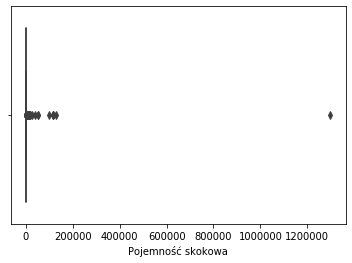

In [366]:
pojemnosc = dane['Pojemność skokowa']
pojemnosc=pojemnosc.ffill().bfill()

sns.boxplot(x=pojemnosc)

#### zerujemy pozycje o nienormalnej pojemności skokowej (powyżej 3 litrów - takich silnikw w motorach nie ma)
#### pozostałe puste (NAN) ustawiamy na średnią

In [367]:
def czysc_pojemnosc_skokowa(zbior):
    zbior.loc[zbior['Pojemność skokowa'] > 3000, 'Pojemność skokowa'] = np.nan
    zbior[zbior['Pojemność skokowa'] > 3000]['Pojemność skokowa'].count()
    zbior.loc[zbior['Pojemność skokowa'].isnull(),'Pojemność skokowa'] = np.trunc(zbior['Pojemność skokowa'].mean())

funkcje_konwersji_danych.append(czysc_pojemnosc_skokowa)
czysc_pojemnosc_skokowa(dane)


#### Po tej operacji pojemności skokowe wyglądają w miarę realistycznie

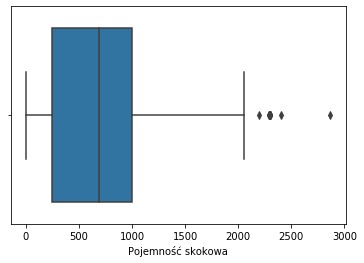

In [368]:
sns.boxplot(x=dane['Pojemność skokowa'])

## Czyścimy pole "Przebieg" - kasujemy spacje i przyrostek "km"

In [369]:
def czysc_pole_przebieg(zbior):
    # tylko jeśli yp danych jeszcze nie przekonwertowany - aby można bylo wiele razy wywołać funkcję
    if dane['Przebieg'].dtypes == 'O':
        zbior['Przebieg'] = zbior['Przebieg'].str.replace('km','')
        zbior['Przebieg'] = zbior['Przebieg'].str.replace(' ','')
        zbior['Przebieg'] = zbior['Przebieg'].astype(float)

czysc_pole_przebieg(dane)
funkcje_konwersji_danych.append(czysc_pole_przebieg)

In [370]:
dane['Przebieg'].dtype

dtype('float64')

#### Jeden rekord nie ma podanego przebiegu - skasujemy ten rekord

In [371]:
dane['Przebieg'].isna().sum()

1

In [372]:
def kasuj_wiersze_bez_przebiegu(df):
    df.drop(df[df['Przebieg'].isnull()].index,axis=0,inplace=True)

funkcje_konwersji_danych.append(kasuj_wiersze_bez_przebiegu)
kasuj_wiersze_bez_przebiegu(dane)
dane['Przebieg'].isna().sum()

0

### Analizujemy pole 'Moc' - czyścimy KM, zamieniamy na liczby

In [373]:
dane['Moc'].head()

0    37 KM
1    98 KM
2    15 KM
3      NaN
4    14 KM
Name: Moc, dtype: object

In [374]:
def czysc_pole_moc(zbior):
    # tylko jeśli yp danych jeszcze nie przekonwertowany - aby można bylo wiele razy wywołać funkcję
    if dane['Moc'].dtypes == 'O':
        zbior['Moc'] = zbior['Moc'].str.replace('KM','')
        zbior['Moc'] = zbior['Moc'].str.replace(' ','')
        zbior['Moc']=zbior['Moc'].astype(float)

funkcje_konwersji_danych.append(czysc_pole_moc)
czysc_pole_moc(dane)

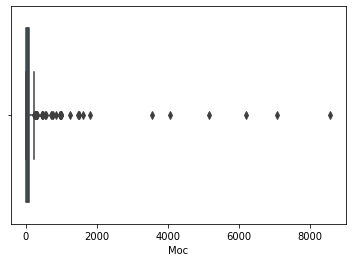

In [375]:
sns.boxplot(x=dane['Moc'])

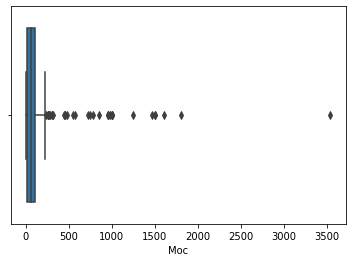

In [376]:
# moce powyżej 1000~2000KM są dla motorów nieprawdopodobne
# sprawdźmy jeszcze zakres < 4000
sns.boxplot(x=dane.loc[dane['Moc']<4000,'Moc'])

### Decyzja - należy wyzerować moce > 2000 KM i przypisać im średnią ze wszystkich mocy

In [377]:
def kasuj_moce_wieksze_od_2000(zbior):
    zbior.loc[zbior['Moc'] > 2000, 'Moc'] = np.nan
    zbior.loc[zbior['Moc'].isnull(),'Moc'] = np.trunc(dane['Moc'].mean())
    
kasuj_moce_wieksze_od_2000(dane)
funkcje_konwersji_danych.append(kasuj_moce_wieksze_od_2000)

#### Teraz dane 'Moc pojazdu' wyglądają bardziej realistycznie

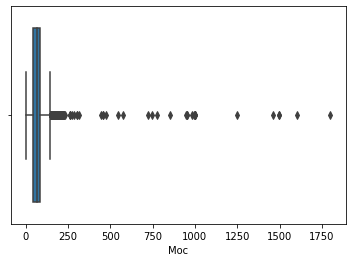

In [378]:
sns.boxplot(x=dane['Moc'])

# Pole 'Kolor'

Czarny        4757
Inny kolor    2359
Niebieski     1842
Biały         1791
Czerwony      1789
Srebrny       1091
Szary         1013
Zielony        714
Bordowy        558
Żółty          350
Brązowy        184
Złoty          136
Fioletowy       75
Beżowy          69
Name: Kolor, dtype: int64


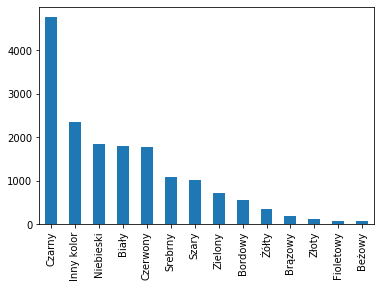

In [379]:
dane.Kolor = dane.Kolor.astype(str)
dane.Kolor.value_counts().plot('bar')
print(dane.Kolor.value_counts())

#### Zróbmy słownik dopuszczalnych kolorów dla których mamy > 100 ofert. 
#### Pozostałe kolory oraz NAN zamienimy na "Inny"

In [380]:
def zamien_kolor_na_inny_dla_mniej_niz_100_ofert(df):
    liczebnosci_kolorow = df.Kolor.value_counts()
    kolory_od_100_ofert = liczebnosci_kolorow[liczebnosci_kolorow>100].index
    df.loc[~df['Kolor'].isin(kolory_od_100_ofert),'Kolor'] = 'Inny'

In [381]:
zamien_kolor_na_inny_dla_mniej_niz_100_ofert(dane)
funkcje_konwersji_danych.append(zamien_kolor_na_inny_dla_mniej_niz_100_ofert)

Czarny        4757
Inny kolor    2359
Niebieski     1842
Biały         1791
Czerwony      1789
Srebrny       1091
Szary         1013
Zielony        714
Bordowy        558
Żółty          350
Brązowy        184
Inny           144
Złoty          136
Name: Kolor, dtype: int64


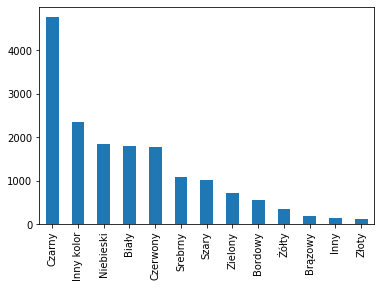

In [382]:
# Sprawdzenie po transformacji
dane.Kolor.value_counts().plot('bar')
print(dane.Kolor.value_counts())

## Pole 'Stan' - ma tylko 2 kategorie, brak NaN - nic tu nie robimy, jest OK

In [383]:
dane['Stan'].value_counts(dropna=False)

Używane    12627
Nowe        4101
Name: Stan, dtype: int64

## Pole 'Oferta od' - ma 2 kategorie, brak NaN - nic tu nie robimy, jest OK

In [384]:
dane['Oferta od'].value_counts(dropna=False)

Firmy              10205
Osoby prywatnej     6523
Name: Oferta od, dtype: int64

## Pola: Typ silnika, Rodzaj napędu : występuja NaN - zamieniamy Nan na Inne

In [385]:
dane['Typ Silnika'].value_counts(dropna=False)

Czterosuwowy    12033
NaN              3952
Dwusuwowy         621
Elektryczny       122
Name: Typ Silnika, dtype: int64

In [386]:
dane['Typ Silnika'].value_counts(dropna=False)

Czterosuwowy    12033
NaN              3952
Dwusuwowy         621
Elektryczny       122
Name: Typ Silnika, dtype: int64

In [387]:
fun_silnik_naped_zamien_nan_na_inne = lambda df: df.fillna(value={'Typ Silnika':'Inne','Rodzaj napędu':'Inne' }, inplace=True)

funkcje_konwersji_danych.append(fun_silnik_naped_zamien_nan_na_inne)
fun_silnik_naped_zamien_nan_na_inne(dane)

## Pole: Typ, wygląda OK, brak NaN - - nic tu nie robimy, jest OK

In [388]:
dane['Typ'].value_counts(dropna=False)

Turystyczny    3488
Skuter         2281
Chopper        2194
Naked          2086
Sportowy       2007
Quad           1609
Cruiser        1098
Enduro         1085
Krosowy         617
Motorower       263
Name: Typ, dtype: int64

## Pole 'Marka pojazdu' (113 marek) - brak NaN 

In [389]:
len(dane['Marka pojazdu'].unique())

113

In [390]:
dane['Marka pojazdu'].describe()

count      16728
unique       113
top       Yamaha
freq        2806
Name: Marka pojazdu, dtype: object

In [391]:
dane.loc[dane['Marka pojazdu'].isnull(),'Marka pojazdu'].count()

0

In [392]:
dane.describe()

,Cena,Moc,Pojemność skokowa,Przebieg,Wiek pojazdu
count,1.672800e+04,16728.000000,16728.000000,1.672800e+04,16728.000000
mean,2.411740e+04,69.640184,688.792025,5.999821e+06,8.384445
std,3.756518e+04,55.529683,463.148086,7.731752e+08,7.414593
min,1.000000e+00,1.000000,1.000000,0.000000e+00,0.000000
25%,8.200000e+03,44.000000,250.000000,1.000000e+00,1.000000
50%,1.550000e+04,69.000000,688.000000,1.200000e+04,7.000000
75%,3.090000e+04,85.000000,998.000000,3.300000e+04,14.000000
max,3.640926e+06,1800.000000,2867.000000,1.000000e+11,30.000000


In [393]:
# Obliczmy sobie średnią cenę dla marki
dane[['Marka pojazdu', 'Cena']].groupby('Marka pojazdu').mean().round().sort_values('Cena',ascending=False)

,Cena
Marka pojazdu,
Adly,1823413.0
Adler,233046.0
Bimota,202950.0
Norton,89500.0
Indian,81206.0
MV AGUSTA,68251.0
Can-Am,67484.0
Polaris,53437.0
Ural,53433.0


#### Dwie pierwsze pozycje to śmieciowe dane - po sprawdzeniu: 
- Adly to zwykły skuter za max. kilka tysięcy
- Adler - w opisie aukcji jest bitmapa z hasłem "Ogłoszenie testowe - proszę zignorować"
- 3 pozycja od góry już realna: Bimota - faktycznie kosztuje majątek 35-38 tys. EUR netto
#### Decyzja - kasujemy "śmieciowe dane" - motory o cenie > 100 tys.

In [394]:
kasuj_nierealne_ceny = lambda df: df.drop(df[df['Cena']>100000].index,axis=0,inplace=True)

funkcje_konwersji_danych.append(kasuj_nierealne_ceny)
kasuj_nierealne_ceny(dane)

## Pole 'Marka pojazdu' (113 marek) - brak NaN - z uwagi na błędy "unknown categories" w zbiorze testowym, marki o liczności < 8 zamieniamy na "Inne"

In [395]:
dane['Marka pojazdu'].value_counts(dropna=False)

Yamaha               2800
Honda                2737
Suzuki               1719
BMW                  1363
Kawasaki             1131
Harley-Davidson       926
KTM                   543
Inny                  404
Can-Am                392
Ducati                317
Kymco                 317
Romet                 305
Aprilia               286
Piaggio               277
Triumph               273
Polaris               236
Junak                 180
Peugeot               179
Vespa                 150
CF Moto               135
Barton                132
Zipp                  130
Husqvarna             104
Keeway                 93
Benyco                 89
Moto Guzzi             88
Indian                 81
SYM                    72
Benelli                71
Bashan                 70
Linhai                 60
MV AGUSTA              56
Hyosung                55
Bajaj                  52
Daelim                 42
Beta                   41
Malaguti               33
Gilera                 30
TGB         

In [396]:
# Marki o iczności mniejszej niż 8 - zamieniamy na "Inne"
dane['Marka pojazdu'].value_counts(dropna=False)[liczniki_marki < 8].index

Index(['Lambretta', 'MBK', 'Big Dog', 'SMC', 'Cagiva', 'Goes', 'Generic',
       'CPI', 'Fantic', 'EGL Eglmotor', 'Jawa', 'Royal Enfield', 'Askoll',
       'Masai', 'Dniepr', 'Ural', 'Zumico', 'Stels', 'Benzer', 'Aeon',
       'Moto Magnus', 'Super Soco', 'Sachs', 'Lifan', 'REX', 'Vectrix', 'AJP',
       'Moto Morini', 'CECTEK', 'Baotian', 'Ferro', 'FYM', 'TM', 'Dinli',
       'Hercules', 'Adly', 'Italjet', 'Zongshen', 'Bimota', 'City-bike',
       'Husaberg', 'Garelli', 'LML', 'Komar', 'Moti', 'Norton', 'Shineray',
       'WSK', 'Cleveland', 'Skyjet', 'Hero', 'Ventus', 'Eagle Motorsports',
       'Hartford'],
      dtype='object')

In [397]:
def unikalne_marki_zamien_na_inne(df):
    unikatowe_marki = df['Marka pojazdu'].value_counts(dropna=False)[liczniki_marki < 8].index.to_list()
    df.loc[df['Marka pojazdu'].isin(unikatowe_marki),'Marka pojazdu'] = "Inne"
    
funkcje_konwersji_danych.append(unikalne_marki_zamien_na_inne)
unikalne_marki_zamien_na_inne(dane)

In [398]:
unikatowe_marki

['Lambretta',
 'MBK',
 'Big Dog',
 'SMC',
 'Cagiva',
 'Goes',
 'Generic',
 'CPI',
 'Fantic',
 'EGL Eglmotor',
 'Jawa',
 'Royal Enfield',
 'Askoll',
 'Masai',
 'Dniepr',
 'Ural',
 'Zumico',
 'Stels',
 'Benzer',
 'Aeon',
 'Moto Magnus',
 'Super Soco',
 'Sachs',
 'Lifan',
 'REX',
 'Vectrix',
 'AJP',
 'Moto Morini',
 'CECTEK',
 'Baotian',
 'Ferro',
 'FYM',
 'TM',
 'Dinli',
 'Hercules',
 'Adly',
 'Italjet',
 'Zongshen',
 'Bimota',
 'City-bike',
 'Husaberg',
 'Garelli',
 'LML',
 'Komar',
 'Moti',
 'Norton',
 'Shineray',
 'WSK',
 'Cleveland',
 'Skyjet',
 'Hero',
 'Ventus',
 'Eagle Motorsports',
 'Hartford']

## Pole 'Model pojazdu' - 661 modeli (bardzo dużo trochę), 89 nan - kasujemy tę kolumnę, bo po podziale na zbiory treningowy/testowy są błędy - pewne kategorie są z zbiorze testowym brak ich w treningowym i na odwrót


In [399]:
kolumny_do_skasowania.append('Model pojazdu')

In [400]:
len(dane['Model pojazdu'].unique())

657

In [401]:
dane['Model pojazdu'].value_counts(dropna=False)

Inny                                   1940
CBR                                     461
R                                       389
GS                                      308
MT                                      270
Shadow                                  258
CB                                      244
Z                                       222
Burgman                                 215
YZF                                     202
K                                       189
CBF                                     185
DL                                      183
FZ                                      178
F                                       175
EXC                                     164
CRF                                     163
GSX-R                                   163
Sportster                               162
Drag Star                               158
Virago                                  156
Outlander                               149
Intruder                        

In [402]:
dane.loc[dane['Model pojazdu'].isnull(),'Marka pojazdu'].count()

89

In [403]:
dane['Model pojazdu'].value_counts().describe(percentiles=[x/10 for x in range(1,11)])

count     656.000000
mean       24.948171
std        87.743591
min         1.000000
10%         1.000000
20%         1.000000
30%         2.000000
40%         3.000000
50%         5.000000
60%         9.000000
70%        15.000000
80%        27.000000
90%        60.500000
100%     1940.000000
max      1940.000000
Name: Model pojazdu, dtype: float64

In [404]:
fun_model_zamien_nan_na_inne = lambda df: df.fillna(value={'Model pojazdu':'Inne' }, inplace=True)

funkcje_konwersji_danych.append(fun_model_zamien_nan_na_inne)
fun_model_zamien_nan_na_inne(dane)

## Na koniec wczytamy ponownie plik danych i przeprowadzimy wszystkie konwersje

In [407]:
def wykonaj_funkcje_konwersji_danych(df, funkcje_konwersji_danych):
    for funkcja in funkcje_konwersji_danych:
        funkcja(df)

skasuj_kolumny = lambda df, kolumny: df.drop(labels=kolumny,axis=1,inplace=True)

In [408]:
dane = wczytaj_plik_danych(PLIK_DANYCH_JSON)
wykonaj_funkcje_konwersji_danych(dane,funkcje_konwersji_danych)
skasuj_kolumny(dane,kolumny_do_skasowania)

Zamieniamy pole Cena na liczby
Przeliczamy ceny inne niż PLN po kursie średnim NBP
EUR 4.2706


In [409]:
dane.head(5)

,Cena,Kolor,Marka pojazdu,Matowy,Metalik,Moc,Oferta od,Perłowy,Pierwszy właściciel,Pojemność skokowa,Przebieg,Rodzaj napędu,Serwisowany w ASO,Stan,Tuning,Typ,Typ Silnika,Wiek pojazdu
0,6800.0,Niebieski,Suzuki,Nie,Tak,37.0,Firmy,Nie,Nie,680.0,60000.0,Łańcuch,Nie,Używane,Nie,Enduro,Czterosuwowy,19
1,19500.0,Niebieski,Suzuki,Nie,Tak,98.0,Osoby prywatnej,Nie,Nie,1255.0,30900.0,Łańcuch,Tak,Używane,Nie,Turystyczny,Czterosuwowy,9
2,11500.0,Szary,Kymco,Nie,Tak,15.0,Osoby prywatnej,Nie,Tak,125.0,5400.0,Pas napędowy,Nie,Używane,Nie,Skuter,Czterosuwowy,2
3,49000.0,Inny kolor,Harley-Davidson,Nie,Tak,69.0,Firmy,Nie,Nie,1202.0,1.0,Pas napędowy,Nie,Nowe,Nie,Cruiser,Czterosuwowy,0
4,6900.0,Czarny,Honda,Nie,Nie,14.0,Firmy,Nie,Nie,125.0,26000.0,Łańcuch,Nie,Używane,Nie,Sportowy,Inne,12


In [410]:
dane[dane.isna()].count()

Cena                   0
Kolor                  0
Marka pojazdu          0
Matowy                 0
Metalik                0
Moc                    0
Oferta od              0
Perłowy                0
Pierwszy właściciel    0
Pojemność skokowa      0
Przebieg               0
Rodzaj napędu          0
Serwisowany w ASO      0
Stan                   0
Tuning                 0
Typ                    0
Typ Silnika            0
Wiek pojazdu           0
dtype: int64

# Budujemy model 

#### Rozdzielany zmienne objaśniające od objaśnianej

In [411]:
y = dane.Cena
X = dane.drop(columns='Cena')

#### Podział na zbiór testowy i uczący

In [412]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [413]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

kolumny_numeryczne = ['Moc', 'Pojemność skokowa','Przebieg','Wiek pojazdu']
kolumny_kategorii = [kol for kol in X_train.columns if kol not in kolumny_numeryczne]
print(kolumny_numeryczne)
print(kolumny_kategorii)

['Moc', 'Pojemność skokowa', 'Przebieg', 'Wiek pojazdu']
['Kolor', 'Marka pojazdu', 'Matowy', 'Metalik', 'Oferta od', 'Perłowy', 'Pierwszy właściciel', 'Rodzaj napędu', 'Serwisowany w ASO', 'Stan', 'Tuning', 'Typ', 'Typ Silnika']


In [414]:
transformer_numeryczny = StandardScaler()
transformer_kategorii = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeryczny, kolumny_numeryczne),
        ('cat', transformer_kategorii, kolumny_kategorii)])

preprocessor.fit(X_train)

# sprawdź czy preprocesor fituje dane train/test - i nie ma błędów
X_train_trans = preprocessor.transform(X_train)
X_test_trans = preprocessor.transform(X_test)

In [420]:
print('Zbiór treningowy - rozmiary', X_train_trans.shape)
print('Zbiór testowy - rozmiary', X_test_trans.shape)

Zbiór treningowy - rozmiary (11024, 97)
Zbiór testowy - rozmiary (5431, 97)


(5431, 97)